In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_counter_by_node(df, counter_id, start_time=None, end_time=None):
    """
    Vẽ đồ thị sự thay đổi counter_value theo thời gian cho một counter_id,
    mỗi node là một đường.

    df: DataFrame chứa các cột:
        ['id', 'node_id', 'counter_id', 'counter_value', 'counter_option', 'trigger_time']
    counter_id: int – mã counter cần vẽ
    start_time, end_time: (optional) giới hạn thời gian, dạng datetime hoặc string 'YYYY-MM-DD'
    """

    # Nếu chưa có cột time (datetime) thì tạo từ trigger_time (epoch giây)
    if 'time' not in df.columns:
        df = df.copy()
        df['time'] = pd.to_datetime(df['trigger_time'], unit='s')

    # Lọc theo counter_id
    sub = df[df['counter_id'] == counter_id]

    # Lọc theo khoảng thời gian nếu có
    if start_time is not None:
        sub = sub[sub['time'] >= pd.to_datetime(start_time)]
    if end_time is not None:
        sub = sub[sub['time'] <= pd.to_datetime(end_time)]

    # Sắp xếp theo thời gian để vẽ đẹp
    sub = sub.sort_values('time')

    plt.figure(figsize=(24, 6))

    # Vẽ mỗi node một đường
    for node_id, grp in sub.groupby('node_id'):
        plt.plot(grp['time'], grp['counter_value'], label=f"node {node_id}")

    plt.xlabel("Time")
    plt.ylabel("counter_value")
    plt.title(f"Counter {counter_id} theo từng node")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('sbc_counter_result.csv')
df.head()

,id,node_id,counter_id,counter_value,counter_option,trigger_time
0,1,1,1,22695,0,1757270367
1,2,1,2,20238,0,1757270367
2,3,1,3,20681,0,1757270367
3,4,1,4,19287,0,1757270367
4,5,1,5,22703,0,1757270367


In [4]:
# Lệnh tìm tất cả các giá trị duy nhất
counter_id = df['counter_id'].unique()
counter_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

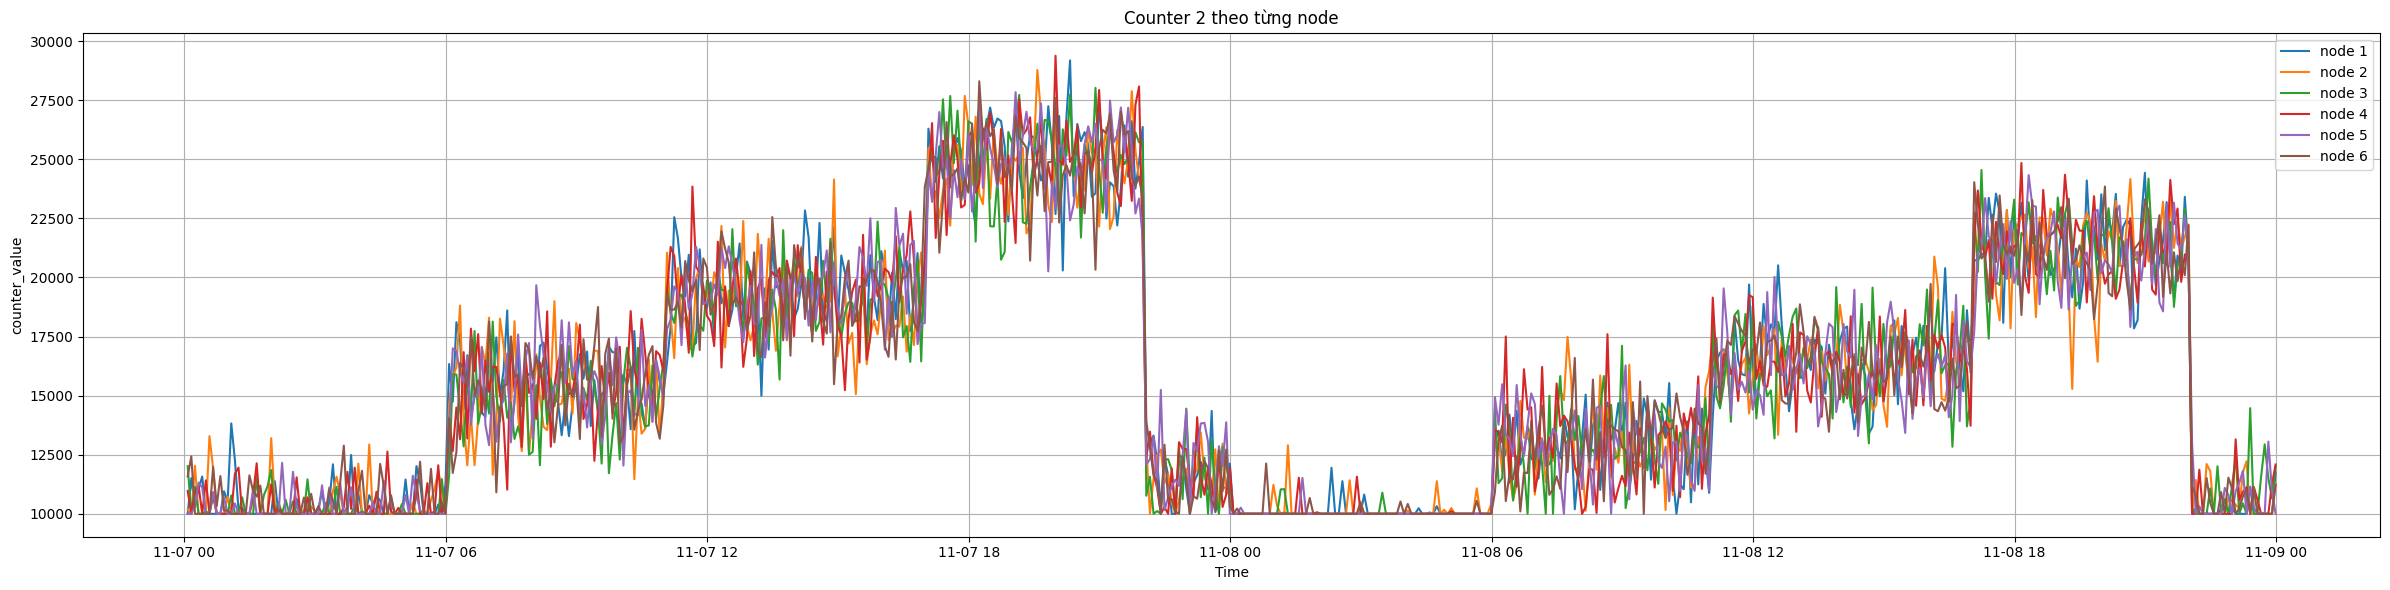

In [15]:
plot_counter_by_node(df, 2, '2025-11-07', '2025-11-09')